In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,year,step1_mod_DRG Definition,mod_DRG Definition
0,0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264,2011,039 - EXTRACRANIAL PROCEDURES,EXTRACRANIAL PROCEDURES
1,1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286,2011,039 - EXTRACRANIAL PROCEDURES,EXTRACRANIAL PROCEDURES
2,2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,4453.791667,2011,039 - EXTRACRANIAL PROCEDURES,EXTRACRANIAL PROCEDURES
3,3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,5417.560000,4129.160000,2011,039 - EXTRACRANIAL PROCEDURES,EXTRACRANIAL PROCEDURES
4,4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,5658.333333,4851.444444,2011,039 - EXTRACRANIAL PROCEDURES,EXTRACRANIAL PROCEDURES


In [12]:
diagnosesgroup = df.groupby('mod_DRG Definition')
revised_diagnosesgroup = diagnosesgroup.sum()
reduced_diagnosesgroup = revised_diagnosesgroup.loc[:, ["Total Discharges"]]
reduced_diagnosesgroup.sort_values("Total Discharges", inplace = True, ascending=[False])
reduced_diagnosesgroup.head(50)

,Total Discharges
mod_DRG Definition,
SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS,2512050
HEART FAILURE & SHOCK,2332528
MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY,2318534
SIMPLE PNEUMONIA & PLEURISY,1844907
CHRONIC OBSTRUCTIVE PULMONARY DISEASE,1780037
RENAL FAILURE,1374123
CARDIAC ARRHYTHMIA & CONDUCTION DISORDERS,1276557
KIDNEY & URINARY TRACT INFECTIONS,1235702
"ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS",1235519


In [16]:
septicemia = df.loc[df['mod_DRG Definition'] == 'SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS']
heart_failure_shock = df.loc[df['mod_DRG Definition'] == 'HEART FAILURE & SHOCK']
major_joint_replacement = df.loc[df['mod_DRG Definition'] == 'MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY']
simple_pneumonia_pleurisy = df.loc[df['mod_DRG Definition'] == 'SIMPLE PNEUMONIA & PLEURISY']
pulmonary_disease = df.loc[df['mod_DRG Definition'] == 'CHRONIC OBSTRUCTIVE PULMONARY DISEASE']

In [28]:
yearly_septicemia = septicemia.groupby('year')
revised_yearly_septicemia = yearly_septicemia.sum()
reduced_yearly_septicemia = revised_yearly_septicemia.loc[:, ["Total Discharges"]]
reduced_yearly_septicemia = reduced_yearly_septicemia.rename(columns = {"Total Discharges": "Total Septicemia Discharges"})
reduced_yearly_septicemia.head()

,Total Septicemia Discharges
year,
2011,431502
2012,464723
2013,521054
2014,573413
2015,521358


In [29]:
yearly_heart_failure_shock = heart_failure_shock.groupby('year')
revised_yearly_heart_failure_shock = yearly_heart_failure_shock.sum()
reduced_yearly_heart_failure_shock = revised_yearly_heart_failure_shock.loc[:, ["Total Discharges"]]
reduced_yearly_heart_failure_shock = reduced_yearly_heart_failure_shock.rename(columns = {"Total Discharges": "Total Heart Failure & Shock Discharges"})
reduced_yearly_heart_failure_shock.head()

,Total Heart Failure & Shock Discharges
year,
2011,496854
2012,461554
2013,455106
2014,450525
2015,468489


In [30]:
yearly_major_joint_replacement = major_joint_replacement.groupby('year')
revised_yearly_major_joint_replacement = yearly_major_joint_replacement.sum()
reduced_yearly_major_joint_replacement = revised_yearly_major_joint_replacement.loc[:, ["Total Discharges"]]
reduced_yearly_major_joint_replacement = reduced_yearly_major_joint_replacement.rename(columns = {"Total Discharges": "Total Major Joint Replacement Discharges"})
reduced_yearly_major_joint_replacement.head()

,Total Major Joint Replacement Discharges
year,
2011,445921
2012,449383
2013,463424
2014,476915
2015,482891


In [31]:
yearly_simple_pneumonia_pleurisy = simple_pneumonia_pleurisy.groupby('year')
revised_yearly_simple_pneumonia_pleurisy = yearly_simple_pneumonia_pleurisy.sum()
reduced_yearly_simple_pneumonia_pleurisy = revised_yearly_simple_pneumonia_pleurisy.loc[:, ["Total Discharges"]]
reduced_yearly_simple_pneumonia_pleurisy = reduced_yearly_simple_pneumonia_pleurisy.rename(columns = {"Total Discharges": "Total Simple Pneumonia & Pleurisy Discharges"})
reduced_yearly_simple_pneumonia_pleurisy.head()

,Total Simple Pneumonia & Pleurisy Discharges
year,
2011,406252
2012,376803
2013,389523
2014,330275
2015,342054


In [32]:
yearly_pulmonary_disease = pulmonary_disease.groupby('year')
revised_yearly_pulmonary_disease = yearly_pulmonary_disease.sum()
reduced_yearly_pulmonary_disease = revised_yearly_pulmonary_disease.loc[:, ["Total Discharges"]]
reduced_yearly_pulmonary_disease = reduced_yearly_pulmonary_disease.rename(columns = {"Total Discharges": "Total Pulmonary Disease Discharges"})
reduced_yearly_pulmonary_disease.head()

,Total Pulmonary Disease Discharges
year,
2011,412958
2012,371563
2013,370800
2014,312012
2015,312704


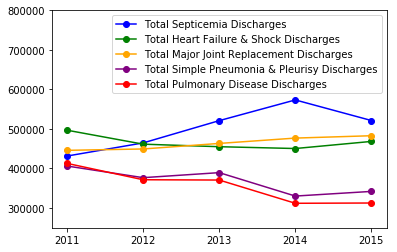

In [59]:
#ax_1 = reduced_yearly_pulmonary_disease.plot(kind = 'line', color = 'blue')
#ax_2 = reduced_yearly_simple_pneumonia_pleurisy.plot(kind = 'line', color = 'orange')
plt.plot(reduced_yearly_septicemia.index.values, reduced_yearly_septicemia['Total Septicemia Discharges'], marker = 'o', color = 'blue')
plt.plot(reduced_yearly_heart_failure_shock.index.values, reduced_yearly_heart_failure_shock['Total Heart Failure & Shock Discharges'], marker = 'o', color = 'green')
plt.plot(reduced_yearly_major_joint_replacement.index.values, reduced_yearly_major_joint_replacement['Total Major Joint Replacement Discharges'], marker = 'o', color = 'orange')
plt.plot(reduced_yearly_simple_pneumonia_pleurisy.index.values, reduced_yearly_simple_pneumonia_pleurisy['Total Simple Pneumonia & Pleurisy Discharges'], marker = 'o', color = 'purple')
plt.plot(reduced_yearly_pulmonary_disease.index.values, reduced_yearly_pulmonary_disease['Total Pulmonary Disease Discharges'], marker = 'o', color = 'red')

plt.xticks(reduced_yearly_septicemia.index.values)
plt.ylim(bottom = 250000, top = 800000)
plt.legend()
plt.show()
